## Нормализованный датасет

In [1]:
import os
import pandas as pd

os.chdir('../../../')

In [2]:
df_normalized = pd.read_csv('data/lmsys-chat-1m/processed/features_normalized.csv',)

### Матрица корреляции

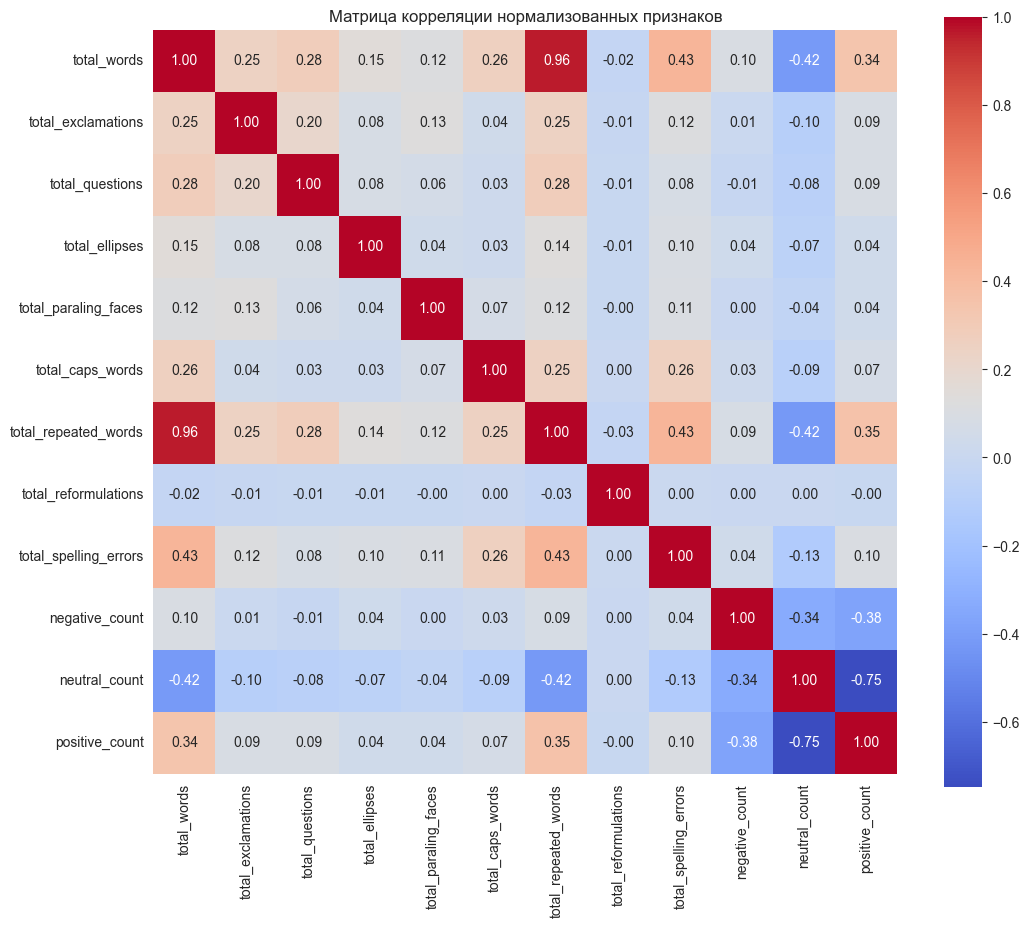

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [
    col for col in df_normalized.columns
    if col != 'user_id' and pd.api.types.is_numeric_dtype(df_normalized[col])
]

# Строим матрицу корреляции
corr_matrix = df_normalized[numeric_cols].corr()

# Визуализация
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Матрица корреляции нормализованных признаков")
plt.show()


### Уберем признаки с сильной корреляцией

In [4]:
df_normalized.drop(['total_repeated_words'], inplace=True, axis=1)
# df_normalized.drop(['neutral_count'], inplace=True, axis=1)


### Подготовка данных

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

X = df_normalized.drop(columns=['user_id'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Находим оптимальное число кластеров по методу локтя

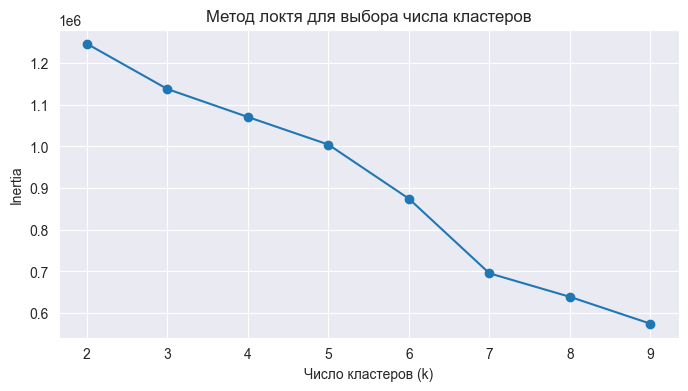

In [6]:
inertia = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title("Метод локтя для выбора числа кластеров")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

### Обучение модели для k=5

In [7]:
k = 5

kmeans_5 = KMeans(n_clusters=k, random_state=42, verbose=True)
kmeans_labels_5 = kmeans_5.fit_predict(X_scaled)

df_kmeans_clusters_5 = df_normalized[['user_id']].copy()
df_kmeans_clusters_5['kmeans_cluster'] = kmeans_labels_5

sil_score = silhouette_score(X_scaled, df_kmeans_clusters_5['kmeans_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

db_score = davies_bouldin_score(X_scaled, df_kmeans_clusters_5['kmeans_cluster'])
print(f"Davies-Bouldin Index: {db_score:.3f}")


Initialization complete
Iteration 0, inertia 1188145.8119739091.
Iteration 1, inertia 1018560.028568177.
Iteration 2, inertia 1012443.2984989176.
Iteration 3, inertia 1008400.0879921308.
Iteration 4, inertia 1006605.100252614.
Iteration 5, inertia 1005433.6375367963.
Iteration 6, inertia 1004967.5035490375.
Iteration 7, inertia 1004791.033073159.
Iteration 8, inertia 1004672.4992127.
Iteration 9, inertia 1004583.4021142981.
Iteration 10, inertia 1004546.420078417.
Iteration 11, inertia 1004537.3743728945.
Iteration 12, inertia 1004536.0602741733.
Converged at iteration 12: strict convergence.
Silhouette Score: 0.445
Davies-Bouldin Index: 1.422


### Обучение модели для k=6

In [8]:
k = 6

kmeans_6 = KMeans(n_clusters=k, random_state=42, verbose=True)
kmeans_labels_6 = kmeans_6.fit_predict(X_scaled)

df_kmeans_clusters_6 = df_normalized[['user_id']].copy()
df_kmeans_clusters_6['kmeans_cluster'] = kmeans_labels_6

sil_score = silhouette_score(X_scaled, df_kmeans_clusters_6['kmeans_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

db_score = davies_bouldin_score(X_scaled, df_kmeans_clusters_6['kmeans_cluster'])
print(f"Davies-Bouldin Index: {db_score:.3f}")

Initialization complete
Iteration 0, inertia 1044978.4876872061.
Iteration 1, inertia 887610.0329359464.
Iteration 2, inertia 882091.9168587861.
Iteration 3, inertia 878283.6451372403.
Iteration 4, inertia 876655.4570978464.
Iteration 5, inertia 875568.620825568.
Iteration 6, inertia 875070.9713806363.
Iteration 7, inertia 874926.1590305709.
Iteration 8, inertia 874769.1556183177.
Iteration 9, inertia 874719.5255899746.
Iteration 10, inertia 874672.8063054148.
Iteration 11, inertia 874644.4133105611.
Iteration 12, inertia 874639.9865294291.
Iteration 13, inertia 874639.0850365795.
Converged at iteration 13: center shift 2.908467884525606e-07 within tolerance 9.999999999996584e-05.
Silhouette Score: 0.407
Davies-Bouldin Index: 1.325


### Обучение модели для k=7

In [9]:
k = 7

kmeans_7 = KMeans(n_clusters=k, random_state=42, verbose=True)
kmeans_labels_7 = kmeans_7.fit_predict(X_scaled)

df_kmeans_clusters_7 = df_normalized[['user_id']].copy()
df_kmeans_clusters_7['kmeans_cluster'] = kmeans_labels_7

sil_score = silhouette_score(X_scaled, df_kmeans_clusters_7['kmeans_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")


db_score = davies_bouldin_score(X_scaled, df_kmeans_clusters_7['kmeans_cluster'])
print(f"Davies-Bouldin Index: {db_score:.3f}")

Initialization complete
Iteration 0, inertia 809944.4755701289.
Iteration 1, inertia 708961.7994063977.
Iteration 2, inertia 705086.909135104.
Iteration 3, inertia 701843.5550057063.
Iteration 4, inertia 699928.1081079998.
Iteration 5, inertia 698929.0003952683.
Iteration 6, inertia 698313.353612916.
Iteration 7, inertia 697987.5086400902.
Iteration 8, inertia 697685.25316002.
Iteration 9, inertia 697457.120820212.
Iteration 10, inertia 697362.33001401.
Iteration 11, inertia 697333.2912361281.
Iteration 12, inertia 697306.6603528621.
Iteration 13, inertia 697254.8698536137.
Iteration 14, inertia 697068.9506535789.
Iteration 15, inertia 696873.6224243446.
Iteration 16, inertia 696510.0648674229.
Iteration 17, inertia 696212.994606197.
Iteration 18, inertia 696130.1361196002.
Iteration 19, inertia 695766.8858609763.
Iteration 20, inertia 695608.7199737579.
Iteration 21, inertia 695573.5275615884.
Converged at iteration 21: center shift 7.785071892913085e-05 within tolerance 9.99999999999

### Визуализация для k=5

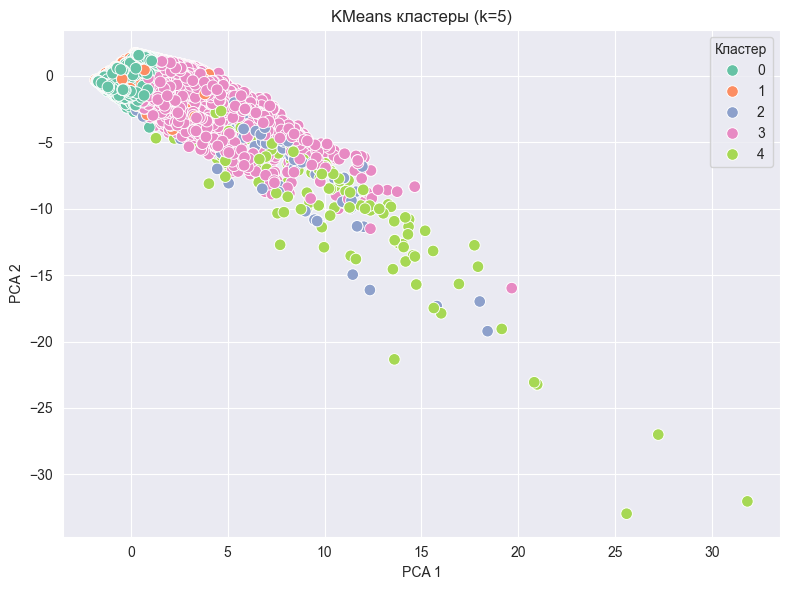

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_kmeans_vis_5 = df_kmeans_clusters_5.copy()
df_kmeans_vis_5['pca1'] = X_pca[:, 0]
df_kmeans_vis_5['pca2'] = X_pca[:, 1]

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_kmeans_vis_5,
    x='pca1',
    y='pca2',
    hue='kmeans_cluster',
    palette='Set2',
    s=70
)
plt.title(f"KMeans кластеры (k=5)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Кластер")
plt.grid(True)
plt.tight_layout()
plt.show()


### Визуализация для k=6

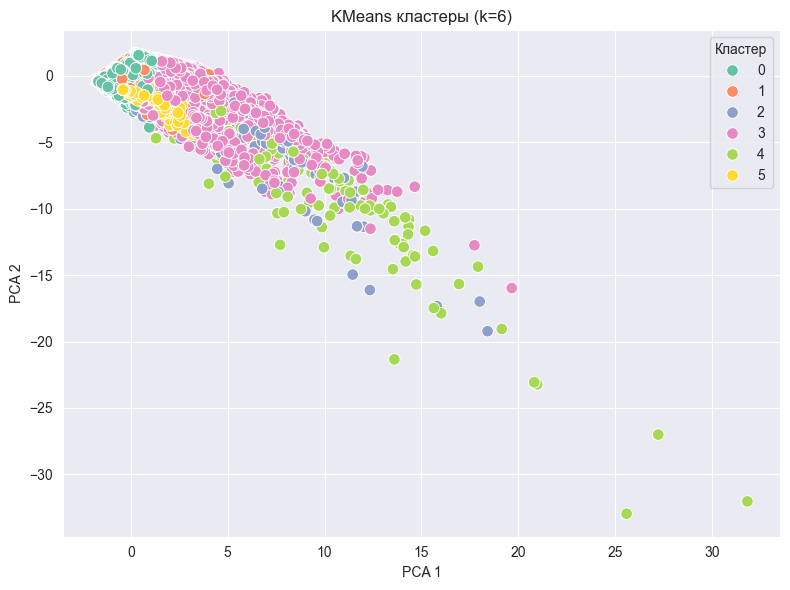

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_kmeans_vis_6 = df_kmeans_clusters_6.copy()
df_kmeans_vis_6['pca1'] = X_pca[:, 0]
df_kmeans_vis_6['pca2'] = X_pca[:, 1]

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_kmeans_vis_6,
    x='pca1',
    y='pca2',
    hue='kmeans_cluster',
    palette='Set2',
    s=70
)
plt.title(f"KMeans кластеры (k=6)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Кластер")
plt.grid(True)
plt.tight_layout()
plt.show()


### Визуализация для k=7

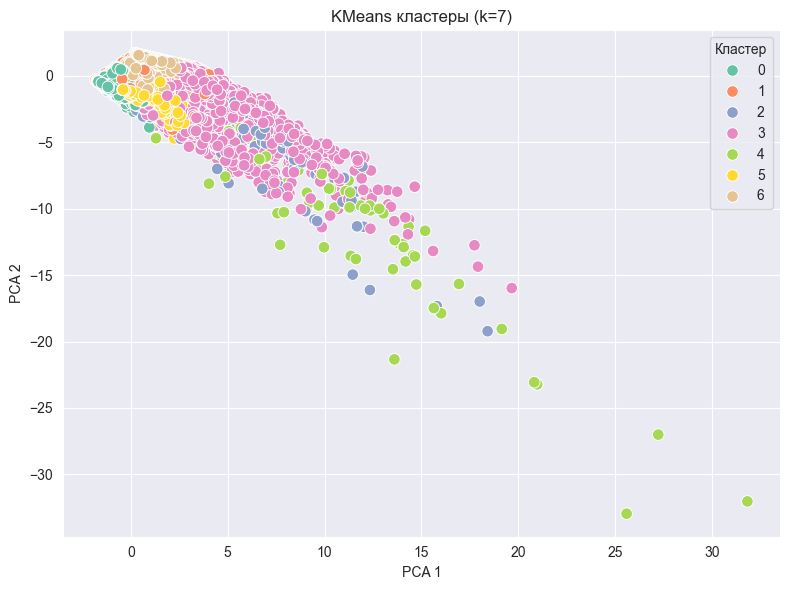

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_kmeans_vis_7 = df_kmeans_clusters_7.copy()
df_kmeans_vis_7['pca1'] = X_pca[:, 0]
df_kmeans_vis_7['pca2'] = X_pca[:, 1]

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_kmeans_vis_7,
    x='pca1',
    y='pca2',
    hue='kmeans_cluster',
    palette='Set2',
    s=70
)
plt.title(f"KMeans кластеры (k=7)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Кластер")
plt.grid(True)
plt.tight_layout()
plt.show()


## Feature importance для нормализованного датасета (через proxy-классификатор)

### Подготовка данных

In [15]:
from sklearn.preprocessing import StandardScaler

X = df_normalized.drop(columns=['user_id'])
y = df_kmeans_clusters_7['kmeans_cluster']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Обучение классификатора (RandomForestClassifier)

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

RandomForestClassifier(random_state=42)

### Определение важностей меток

In [17]:
importances = rf.feature_importances_
feature_names = X.columns

df_feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

### Визуализация важностей меток

C:\Users\hqdem\AppData\Local\Temp\ipykernel_24796\3726250425.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_feature_importance.head(15), x='importance', y='feature', palette='viridis')


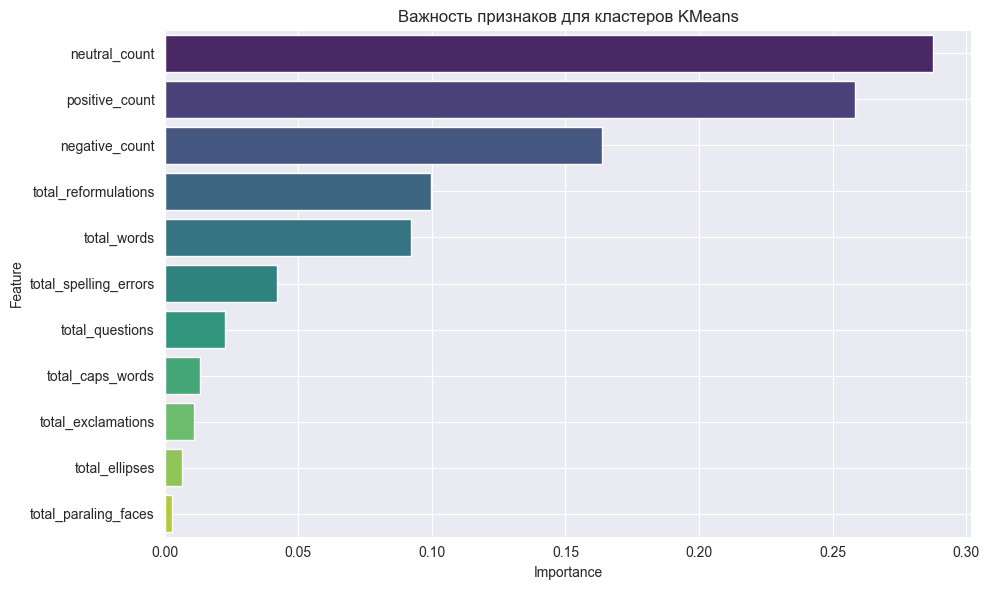

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df_feature_importance.head(15), x='importance', y='feature', palette='viridis')
plt.title("Важность признаков для кластеров KMeans")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()


### Анализ важностей меток

Топ 3 признака оказались:
- `neutral_count`
- `positive_count`
- `negative_count`

Это может говорить о том, что эмоциональная окраска сообщений (сентимент) — главный фактор, по которому делятся кластеры.

Также важными факторами являются метки
- `total_reformulations`
- `total_words`

Метками средней важности являются
- `total_spelling_errors`
- `total_questions`

Менее значимыми признаками являются
- `total_caps_words`
- `total_exclamations`
- `total_ellipses`
- `total_paraling_faces`

Эти признаки:
- Практически не участвуют в разделении кластеров;
- Могут вносить шум;
- Добавляют размерность, но не дают ценности.

Тем самым есть смысл исключить их из выборки и снова провести кластеризацию.

## Нормализованный датасет с учетом важности меток

### Исключение меток из нормализованного датасета

In [19]:
selected_features = [
    'neutral_count',
    'positive_count',
    'negative_count',
    'total_reformulations',
    'total_words',
    'total_spelling_errors',
    'total_questions'
]

df_selected = df_normalized[['user_id'] + selected_features].copy()

df_selected.head(10)

,user_id,neutral_count,positive_count,negative_count,total_reformulations,total_words,total_spelling_errors,total_questions
0,0,0.000000,1.0,0.000000,0.0,11.000000,0.0,0.000000
1,1,0.333333,0.5,0.166667,0.5,25.000000,0.5,0.666667
2,2,0.000000,1.0,0.000000,0.0,66.000000,0.0,0.000000
3,3,0.500000,0.5,0.000000,0.0,14.500000,0.0,0.000000
4,4,1.000000,0.0,0.000000,0.0,18.000000,3.0,0.000000
5,5,0.000000,1.0,0.000000,0.0,46.000000,0.0,2.000000
6,6,0.000000,1.0,0.000000,0.0,182.000000,3.0,4.000000
7,7,0.000000,1.0,0.000000,0.0,111.000000,0.0,3.000000
8,8,0.000000,0.0,1.000000,0.0,25.000000,2.0,0.000000
9,9,1.000000,0.0,0.000000,0.0,9.833333,0.5,0.000000


### Подготовка данных

In [20]:
from sklearn.preprocessing import StandardScaler

X = df_selected.drop(columns=['user_id'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Находим оптимальное число кластеров по методу локтя

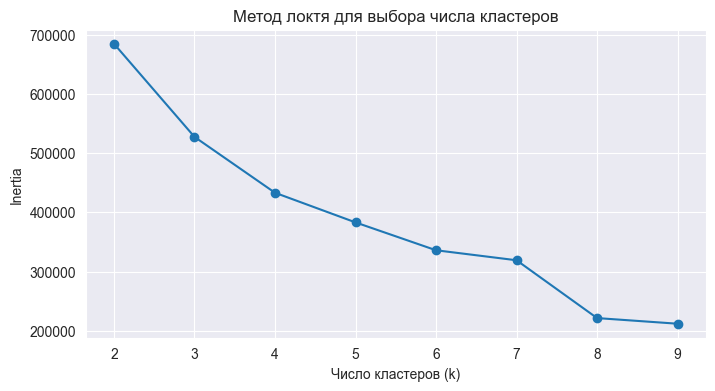

In [21]:
inertia = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title("Метод локтя для выбора числа кластеров")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

### Обучение модели для k=5

In [22]:
k = 5

kmeans_5 = KMeans(n_clusters=k, random_state=42, verbose=True)
kmeans_labels_5 = kmeans_5.fit_predict(X_scaled)

df_kmeans_clusters_5 = df_selected[['user_id']].copy()
df_kmeans_clusters_5['kmeans_cluster'] = kmeans_labels_5

sil_score = silhouette_score(X_scaled, df_kmeans_clusters_5['kmeans_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

db_score = davies_bouldin_score(X_scaled, df_kmeans_clusters_5['kmeans_cluster'])
print(f"Davies-Bouldin Index: {db_score:.3f}")


Initialization complete
Iteration 0, inertia 542501.0457492543.
Iteration 1, inertia 435827.3451895538.
Iteration 2, inertia 409420.22596306715.
Iteration 3, inertia 392358.8522386624.
Iteration 4, inertia 386369.63648189575.
Iteration 5, inertia 385198.0467267142.
Iteration 6, inertia 384802.3368364706.
Iteration 7, inertia 384564.4078351321.
Iteration 8, inertia 384384.7671857991.
Iteration 9, inertia 384220.7241846998.
Iteration 10, inertia 384069.5872673459.
Iteration 11, inertia 383906.10181830334.
Iteration 12, inertia 383747.6094763897.
Iteration 13, inertia 383575.3679614126.
Iteration 14, inertia 383404.9101079445.
Iteration 15, inertia 383203.1561453788.
Iteration 16, inertia 383131.97061371204.
Iteration 17, inertia 383099.2670650061.
Iteration 18, inertia 383085.7379900992.
Iteration 19, inertia 383082.4948695244.
Converged at iteration 19: center shift 5.967662466270042e-05 within tolerance 9.999999999997186e-05.
Silhouette Score: 0.498
Davies-Bouldin Index: 0.985


### Обучение модели для k=6

In [23]:
k = 6

kmeans_6 = KMeans(n_clusters=k, random_state=42, verbose=True)
kmeans_labels_6 = kmeans_6.fit_predict(X_scaled)

df_kmeans_clusters_6 = df_selected[['user_id']].copy()
df_kmeans_clusters_6['kmeans_cluster'] = kmeans_labels_6

sil_score = silhouette_score(X_scaled, df_kmeans_clusters_6['kmeans_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

db_score = davies_bouldin_score(X_scaled, df_kmeans_clusters_6['kmeans_cluster'])
print(f"Davies-Bouldin Index: {db_score:.3f}")


Initialization complete
Iteration 0, inertia 487074.6659198359.
Iteration 1, inertia 376407.0013128837.
Iteration 2, inertia 369905.26481355616.
Iteration 3, inertia 363868.6926940033.
Iteration 4, inertia 355804.75453967345.
Iteration 5, inertia 344998.22820480884.
Iteration 6, inertia 338499.5997460875.
Iteration 7, inertia 336557.20860072016.
Iteration 8, inertia 336260.57696481136.
Iteration 9, inertia 336208.9919477884.
Iteration 10, inertia 336198.47363592545.
Iteration 11, inertia 336194.6643004551.
Iteration 12, inertia 336188.7026905201.
Iteration 13, inertia 336170.8960414254.
Iteration 14, inertia 336125.0490980227.
Iteration 15, inertia 336081.71546486893.
Iteration 16, inertia 336069.2577549126.
Iteration 17, inertia 336066.7788569871.
Converged at iteration 17: center shift 2.1828368531193164e-05 within tolerance 9.999999999997186e-05.
Silhouette Score: 0.503
Davies-Bouldin Index: 0.864


### Обучение модели для k=7

In [24]:
k = 7

kmeans_7 = KMeans(n_clusters=k, random_state=42, verbose=True)
kmeans_labels_7 = kmeans_7.fit_predict(X_scaled)

df_kmeans_clusters_7 = df_selected[['user_id']].copy()
df_kmeans_clusters_7['kmeans_cluster'] = kmeans_labels_7

sil_score = silhouette_score(X_scaled, df_kmeans_clusters_7['kmeans_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

db_score = davies_bouldin_score(X_scaled, df_kmeans_clusters_7['kmeans_cluster'])
print(f"Davies-Bouldin Index: {db_score:.3f}")


Initialization complete
Iteration 0, inertia 445989.6871368465.
Iteration 1, inertia 340487.0889750226.
Iteration 2, inertia 323839.69526630826.
Iteration 3, inertia 320628.2331590592.
Iteration 4, inertia 319721.6501091645.
Iteration 5, inertia 319309.316437513.
Iteration 6, inertia 319235.01131693047.
Iteration 7, inertia 319199.6074965111.
Iteration 8, inertia 319188.68441221555.
Iteration 9, inertia 319184.9571157474.
Iteration 10, inertia 319183.8975489045.
Converged at iteration 10: center shift 8.594214761209209e-05 within tolerance 9.999999999997186e-05.
Silhouette Score: 0.500
Davies-Bouldin Index: 0.929


### Визуализация для k=5

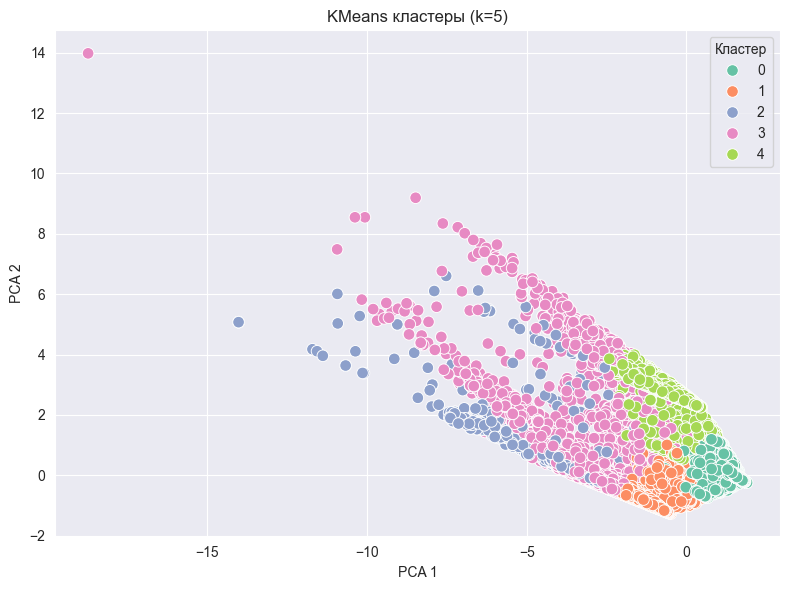

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_kmeans_vis_5 = df_kmeans_clusters_5.copy()
df_kmeans_vis_5['pca1'] = X_pca[:, 0]
df_kmeans_vis_5['pca2'] = X_pca[:, 1]

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_kmeans_vis_5,
    x='pca1',
    y='pca2',
    hue='kmeans_cluster',
    palette='Set2',
    s=70
)
plt.title(f"KMeans кластеры (k=5)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Кластер")
plt.grid(True)
plt.tight_layout()
plt.show()


### Визуализация для k=6

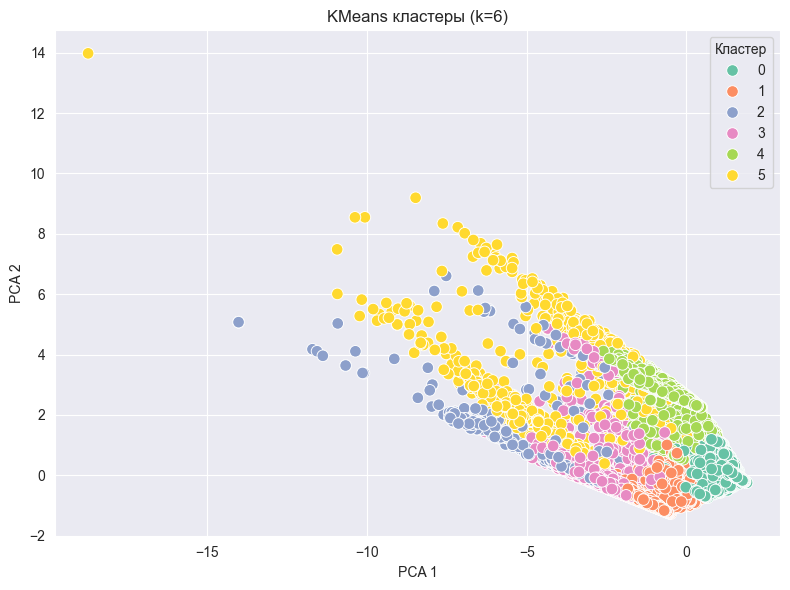

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_kmeans_vis_6 = df_kmeans_clusters_6.copy()
df_kmeans_vis_6['pca1'] = X_pca[:, 0]
df_kmeans_vis_6['pca2'] = X_pca[:, 1]

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_kmeans_vis_6,
    x='pca1',
    y='pca2',
    hue='kmeans_cluster',
    palette='Set2',
    s=70
)
plt.title(f"KMeans кластеры (k=6)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Кластер")
plt.grid(True)
plt.tight_layout()
plt.show()


### Визуализация для k=7

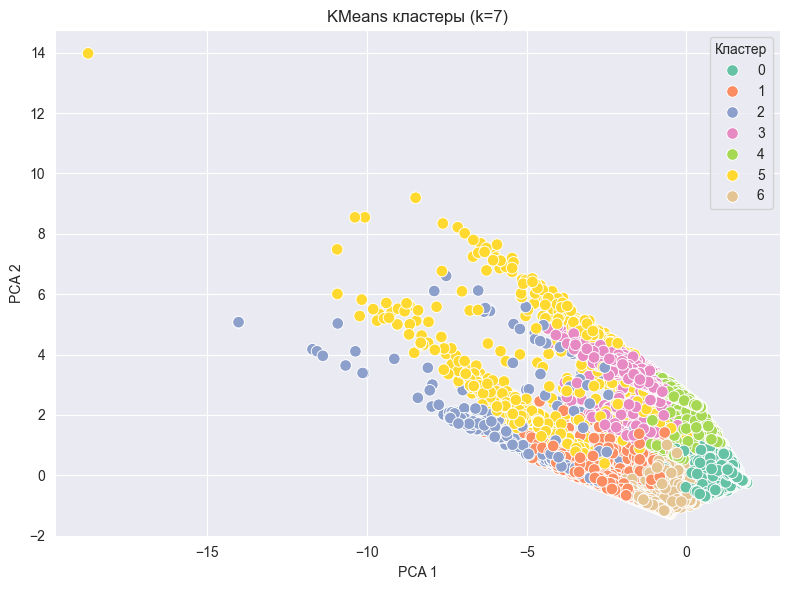

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_kmeans_vis_7 = df_kmeans_clusters_7.copy()
df_kmeans_vis_7['pca1'] = X_pca[:, 0]
df_kmeans_vis_7['pca2'] = X_pca[:, 1]

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_kmeans_vis_7,
    x='pca1',
    y='pca2',
    hue='kmeans_cluster',
    palette='Set2',
    s=70
)
plt.title(f"KMeans кластеры (k=7)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Кластер")
plt.grid(True)
plt.tight_layout()
plt.show()


### Сохранение результатов

Лучшие результаты показал Kmeans с k=6 с учетом исключенных меток

In [29]:
df_selected_with_clusters = df_selected.copy()
df_selected_with_clusters['cluster'] = kmeans_labels_6

df_selected_with_clusters.to_csv('data/lmsys-chat-1m/processed/kmeans_clusters.csv', index=False)

df_selected_with_clusters.head(10)

,user_id,neutral_count,positive_count,negative_count,total_reformulations,total_words,total_spelling_errors,total_questions,cluster
0,0,0.000000,1.0,0.000000,0.0,11.000000,0.0,0.000000,1
1,1,0.333333,0.5,0.166667,0.5,25.000000,0.5,0.666667,1
2,2,0.000000,1.0,0.000000,0.0,66.000000,0.0,0.000000,1
3,3,0.500000,0.5,0.000000,0.0,14.500000,0.0,0.000000,0
4,4,1.000000,0.0,0.000000,0.0,18.000000,3.0,0.000000,0
5,5,0.000000,1.0,0.000000,0.0,46.000000,0.0,2.000000,1
6,6,0.000000,1.0,0.000000,0.0,182.000000,3.0,4.000000,2
7,7,0.000000,1.0,0.000000,0.0,111.000000,0.0,3.000000,1
8,8,0.000000,0.0,1.000000,0.0,25.000000,2.0,0.000000,4
9,9,1.000000,0.0,0.000000,0.0,9.833333,0.5,0.000000,0
